In [ ]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def _heapify_up(self, index):
        parent_index = (index - 1) // 2
        if index > 0 and self.heap[index] > self.heap[parent_index]:
            self.heap[index], self.heap[parent_index] = self.heap[parent_index], self.heap[index]
            self._heapify_up(parent_index)

    def _heapify_down(self, index):
        left_child_index = 2 * index + 1
        right_child_index = 2 * index + 2
        largest = index

        if left_child_index < len(self.heap) and self.heap[left_child_index] > self.heap[largest]:
            largest = left_child_index

        if right_child_index < len(self.heap) and self.heap[right_child_index] > self.heap[largest]:
            largest = right_child_index

        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self._heapify_down(largest)

    def insert(self, element):
        self.heap.append(element)
        self._heapify_up(len(self.heap) - 1)

    def delete(self):
        if len(self.heap) > 1:
            self.heap[0], self.heap[-1] = self.heap[-1], self.heap[0]
            max_element = self.heap.pop()
            self._heapify_down(0)
        elif self.heap:
            max_element = self.heap.pop()
        else:
            max_element = None
        return max_element

    def get_max(self):
        if self.heap:
            return self.heap[0]
        return None

heap = MaxHeap()
heap.insert(10)
heap.insert(4)
heap.insert(15)
heap.insert(20)

print("Max Element:", heap.get_max())
print("Deleted Element:", heap.delete())
print("Max Element:", heap.get_max())


Max Element: 20
Deleted Element: 20
Max Element: 15


In [ ]:
import requests
from time import sleep

def fetch_url_content(url):
    max_retries = 3
    retry_delay = 1  # seconds

    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=5)
            response.raise_for_status()  # Raise an HTTPError for bad responses
            return response.text
        except requests.exceptions.HTTPError as http_err:
            print(f"HTTP error occurred: {http_err} - Retrying... ({attempt + 1}/{max_retries})")
        except requests.exceptions.ConnectionError as conn_err:
            print(f"Connection error occurred: {conn_err} - Retrying... ({attempt + 1}/{max_retries})")
        except requests.exceptions.Timeout as timeout_err:
            print(f"Timeout error occurred: {timeout_err} - Retrying... ({attempt + 1}/{max_retries})")
        except requests.exceptions.RequestException as req_err:
            print(f"Error occurred: {req_err} - Retrying... ({attempt + 1}/{max_retries})")

        sleep(retry_delay)

    print(f"Failed to retrieve content from {url} after {max_retries} attempts.")
    return None

def download_contents(urls):
    contents = {}
    for url in urls:
        print(f"Attempting to download content from {url}")
        content = fetch_url_content(url)
        if content is not None:
            contents[url] = content
        else:
            contents[url] = "Failed to retrieve content."

    return contents

# Example usage:
urls = [
    "https://www.example.com",
    "https://www.nonexistenturl.xyz",
    "https://www.google.com"
]

content_dict = download_contents(urls)
for url, content in content_dict.items():
    print(f"Content from {url[:30]}...: {content[:100]}...\n")


Attempting to download content from https://www.example.com
Attempting to download content from https://www.nonexistenturl.xyz
Connection error occurred: HTTPSConnectionPool(host='www.nonexistenturl.xyz', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7947f0021990>: Failed to resolve 'www.nonexistenturl.xyz' ([Errno -2] Name or service not known)")) - Retrying... (1/3)
Connection error occurred: HTTPSConnectionPool(host='www.nonexistenturl.xyz', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7947f00222c0>: Failed to resolve 'www.nonexistenturl.xyz' ([Errno -2] Name or service not known)")) - Retrying... (2/3)
Connection error occurred: HTTPSConnectionPool(host='www.nonexistenturl.xyz', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7947f0022b60>: Failed to re

Mean Squared Error: 0.5558915986952422
R^2 Score: 0.5757877060324524


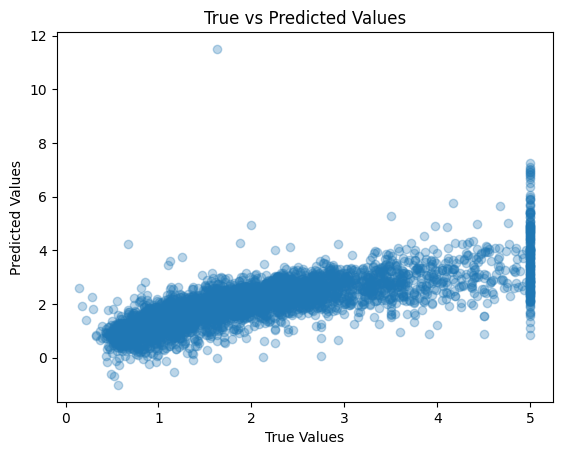

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def clean_and_preprocess(df):
    # Separate features and target if necessary (assuming the last column is the target)
    # X = df.iloc[:, :-1]
    # y = df.iloc[:, -1]

    # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Create a preprocessing pipeline for numerical data
    numerical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
        ('scaler', StandardScaler())  # Normalize the data
    ])

    # Create a preprocessing pipeline for categorical data
    categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical data
    ])

    # Combine numerical and categorical pipelines
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_cols),
            ('cat', categorical_pipeline, categorical_cols)
        ]
    )

    # Apply the preprocessing pipeline
    df_cleaned = preprocessor.fit_transform(df)

    # Convert the result to a DataFrame and include feature names
    df_cleaned = pd.DataFrame(df_cleaned, columns=numerical_cols.tolist() + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)))

    return df_cleaned

# Example usage:
# Sample DataFrame
data = {
    'age': [25, 30, np.nan, 35, 40],
    'salary': [50000, 60000, 70000, np.nan, 90000],
    'city': ['New York', 'Los Angeles', 'Chicago', np.nan, 'Houston']
}
df = pd.DataFrame(data)

# Clean and preprocess the DataFrame
cleaned_df = clean_and_preprocess(df)
print(cleaned_df)


   age    salary  city_Chicago  city_Houston  city_Los Angeles  city_New York
0 -1.5 -1.322876           0.0           0.0               0.0            1.0
1 -0.5 -0.566947           0.0           0.0               1.0            0.0
2  0.0  0.188982           1.0           0.0               0.0            0.0
3  0.5  0.000000           1.0           0.0               0.0            0.0
4  1.5  1.700840           0.0           1.0               0.0            0.0


In [ ]:
def fibonacci(n):
    if n <= 0:
        raise ValueError("Input must be a positive integer.")
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

n=int(input("Enter the limit:"))
fib=fibonacci(n)
print(f"The {n}th Fibonacci number is {fib}")

Enter the limit:10
The 10th Fibonacci number is 34


In [ ]:
def divide_numbers(numerator, divisor):
    try:
        result = numerator / divisor
        print("The quotient is")
        return result
    except ZeroDivisionError:
        return "Error: Division by zero is not allowed."

# Example usage:
numerator =int(input("Enter numerator:"))
divisor = int(input("enter denominator:"))
result = divide_numbers(numerator, divisor)
print(result)  # Should print "Error: Division by zero is not allowed."


Enter numerator:4
enter denominator:2
The quotient is
2.0


In [1]:
import logging

# Configure logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# Create a handler to display logs in the notebook
handler = logging.StreamHandler()
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Add the handler to the logger
if not logger.handlers:
    logger.addHandler(handler)


In [2]:
import logging
import time

# Configure logging
logging.basicConfig(level=logging.INFO)

def time_logger(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()  # Record the start time
        result = func(*args, **kwargs)  # Execute the function
        end_time = time.time()  # Record the end time
        execution_time = end_time - start_time  # Calculate the execution time
        logging.info(f"Function '{func.__name__}' executed in {execution_time:.4f} seconds")
        return result
    return wrapper


In [3]:
@time_logger
def fibonacci(n):
    if n <= 0:
        raise ValueError("Input must be a positive integer.")
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)
n = 10  # Example value of n
fib_result = fibonacci(n)
print(f"The {n}th Fibonacci number is {fib_result}")


INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0116 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0179 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0046 seconds
INFO:root:Function 'fibonacci' executed in 0.0268 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0045 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0087 seconds
INFO:root:Function 'fibonacci' executed in 0.0393 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Func

The 10th Fibonacci number is 34


In [5]:
def arithmetic_operation(num1, num2, operator):
    if operator == '+':
        return num1 + num2
    elif operator == '-':
        return num1 - num2
    elif operator == '*':
        return num1 * num2
    elif operator == '/':
        if num2 == 0:
            raise ValueError("Division by zero is not allowed.")
        return num1 / num2
    else:
        raise ValueError("Invalid operator. Please use '+', '-', '*', or '/'.")


num1 = int(input("Enter number1:"))
num2 = int(input("Enter number2:"))
operator = input("Enter operator:")

result = arithmetic_operation(num1, num2, operator)
print(f"{num1} {operator} {num2} = {result}")


Enter number1:56
Enter number2:9
Enter operator:/
56 / 9 = 6.222222222222222


In [6]:
import random
import string

def generate_random_password(length=12):
    # Define characters to choose from
    letters = string.ascii_letters  # uppercase + lowercase letters
    digits = string.digits  # digits
    special_chars = string.punctuation  # special characters

    # Combine all characters
    all_chars = letters + digits + special_chars

    # Generate a password with random choices from all_chars
    password = ''.join(random.choice(all_chars) for _ in range(length))

    return password

# Example usage:
password = generate_random_password()
print("Generated Password:", password)


Generated Password: &(g(S5x[{->r


In [8]:
def transpose_matrix(matrix):


    rows = len(matrix)
    cols = len(matrix[0]) if rows > 0 else 0


    transpose = [[0 for _ in range(rows)] for _ in range(cols)]

    # Fill the transpose matrix
    for i in range(rows):
        for j in range(cols):
            transpose[j][i] = matrix[i][j]

    return transpose

# Example usage:
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

transposed_matrix = transpose_matrix(matrix)
print("The transpose of the matrix is:")
for row in transposed_matrix:
    print(row)


The transpose of the matrix is:
[1, 4, 7]
[2, 5, 8]
[3, 6, 9]
